# CS 4662 Final Project

Dog Emotion Detection

Group: Jonah Kim, Kenneth Lieu, Minsu Lee, Peter Han, Thomas Benson

Technique: ANN

In [1]:
####################
# IMPORT LIBRARIES #
####################
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
#####################################
# Load label data from local drive  #
#####################################
local_path = r".\archive\Dog Emotion\labels.csv"
labels = pd.read_csv(local_path)

# Sort the labels
sorted_labels = labels.sort_values(by="filename")

############
# CHECK IT #
############
sorted_labels.head(20)

,Unnamed: 0,filename,label
543,543,001ndHD2FL3RHNrUp29Qp4WvTiHo5K388.jpg,sad
2695,2695,02moEqkRoDqAbzoLSBOuzFd3iVK53n423.jpg,relaxed
824,824,02rDGGot7kGU3cKIB5qhOfPaetpRNq548.jpg,sad
929,929,04FMq3exmYnLxQ85XzYhS0a9Mrb5Ic420.jpg,happy
607,607,04SQoOw0cFD5lsACrLRCmUWFPu16AU746.jpg,sad
382,382,04f9aAUe5glmLufixJGSc9Yv1X2mRU123.jpg,relaxed
1369,1369,05fRy39hx2kiC09SbErKww536WBPym179.jpg,happy
3855,3855,08mrG3hgF3M4bmy65ZJZBmYulhJ1es699.jpg,happy
2017,2017,09dUVMcjCDfOtbeYDQg5Fvu3GPHWJg811.jpg,angry
2399,2399,09qhORmLRHfy6HgNlXTDlqJVk1NJod130.jpg,sad


In [3]:
###########################################################
# Determine average dimensions of the images for resizing #
###########################################################
path = r".\archive\Dog Emotion\Dogs"

# widths = []
# heights = []

# for file in os.listdir(path):
#     img_path = os.path.join(path, file)
#     img = cv2.imread(img_path)
#     height, width, _ = img.shape
    
#     widths.append(width)
#     heights.append(height)

# avg_width = sum(widths) / len(widths)
# avg_height = sum(heights) / len(heights)

# print(f"Average width: {avg_width}")
# print(f"Average height: {avg_height}")

In [4]:
import os
##############
# Load image #
##############
images = []

#Need to ensure the images are sorted
sorted_files = sorted(os.listdir(path))

#Load the images into an array
for fil in sorted_files:
    img = mpimg.imread(os.path.join(path, fil))
    images.append(img)

In [5]:
############################
# Resize images to 384x384 #
############################
desired_shape = (192, 192)
resized_images = []
for img in images:
    resized_img = cv2.resize(img, desired_shape, interpolation=cv2.INTER_AREA)
    resized_images.append(resized_img)

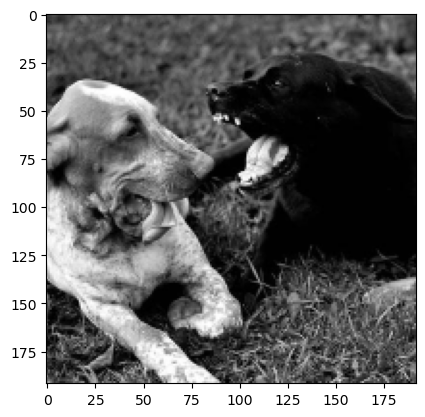

In [6]:
############
# Check it #
############
#print(sorted_files[3950:3999])
plt.imshow(resized_images[3999], cmap=plt.cm.gray)

In [7]:
#############################################
# Build the feature matrix and label vector #
#############################################
X = np.array([img.flatten() for img in resized_images])
y = labels.iloc[:, -1]

#####################
# Check data frames #
#####################
print(f"X Shape:{X.shape}\ny Shape:{y.shape}")

X Shape:(4000, 110592)
y Shape:(4000,)


In [8]:
##########################
# Normalize the features #
##########################
X_normal = scale(X)

In [9]:
# Calculate the mean and standard deviation of the scaled features to verify normalization
mean = X_normal.mean(axis=0)
std_dev = X_normal.std(axis=0)

print("Mean of the scaled features:", mean)
print("Standard deviation of the scaled features:", std_dev)

Mean of the scaled features: [ 3.37854744e-17 -6.53158083e-17  2.43763343e-17 ... -3.87190280e-17
 -4.00790512e-17 -7.48012763e-18]
Standard deviation of the scaled features: [1. 1. 1. ... 1. 1. 1.]


In [10]:
##################
# Create the ANN #
##################
my_ANN = MLPClassifier(hidden_layer_sizes=(16,16,16,8,8,8), 
                       random_state=1, 
                       learning_rate_init=0.02,
                       solver='sgd', 
                       alpha=0.1, 
                       verbose=True,
                       activation='relu', 
                       tol=0.0002
                      )

####################
# Cross Validation #
####################
accuracy_list = cross_val_score(my_ANN, X_normal, y, cv=10, scoring='accuracy')

##########################
# Calculate the accuracy #
##########################
accuracy_cv = accuracy_list.mean()
print(f"\nAccuracy: {round(accuracy_cv, 4)}")

Iteration 1, loss = 1.44539780
Iteration 2, loss = 1.42423993
Iteration 3, loss = 1.41113107
Iteration 4, loss = 1.40021827
Iteration 5, loss = 1.39822828
Iteration 6, loss = 1.39109930
Iteration 7, loss = 1.37997713
Iteration 8, loss = 1.36801947
Iteration 9, loss = 1.35660656
Iteration 10, loss = 1.33494077
Iteration 11, loss = 1.32897910
Iteration 12, loss = 1.30764790
Iteration 13, loss = 1.29473855
Iteration 14, loss = 1.28203701
Iteration 15, loss = 1.24849627
Iteration 16, loss = 1.25846186
Iteration 17, loss = 1.21639812
Iteration 18, loss = 1.19167013
Iteration 19, loss = 1.15965870
Iteration 20, loss = 1.15258945
Iteration 21, loss = 1.13741065
Iteration 22, loss = 1.14115695
Iteration 23, loss = 1.09675047
Iteration 24, loss = 1.07425657
Iteration 25, loss = 1.01643392
Iteration 26, loss = 1.01614546
Iteration 27, loss = 0.99835900
Iteration 28, loss = 0.97642501
Iteration 29, loss = 0.97966201
Iteration 30, loss = 0.98345213
Iteration 31, loss = 0.96873153
Iteration 32, los

Iteration 15, loss = 1.23311825
Iteration 16, loss = 1.21120250
Iteration 17, loss = 1.19731658
Iteration 18, loss = 1.17965716
Iteration 19, loss = 1.16077574
Iteration 20, loss = 1.11105433
Iteration 21, loss = 1.10255232
Iteration 22, loss = 1.10896480
Iteration 23, loss = 1.09772838
Iteration 24, loss = 1.11857063
Iteration 25, loss = 1.07952529
Iteration 26, loss = 1.06176312
Iteration 27, loss = 1.03073058
Iteration 28, loss = 1.01094461
Iteration 29, loss = 1.06139106
Iteration 30, loss = 1.02641962
Iteration 31, loss = 1.00491833
Iteration 32, loss = 0.94559281
Iteration 33, loss = 0.93412239
Iteration 34, loss = 0.91923261
Iteration 35, loss = 0.93240879
Iteration 36, loss = 0.92341131
Iteration 37, loss = 0.88055040
Iteration 38, loss = 0.88746857
Iteration 39, loss = 0.88899147
Iteration 40, loss = 0.86151260
Iteration 41, loss = 0.86586836
Iteration 42, loss = 0.78027212
Iteration 43, loss = 0.85162042
Iteration 44, loss = 0.88685449
Iteration 45, loss = 0.88133223
Iteratio

Iteration 36, loss = 0.79862717
Iteration 37, loss = 0.77177825
Iteration 38, loss = 0.75038044
Iteration 39, loss = 0.80094052
Iteration 40, loss = 0.80202758
Iteration 41, loss = 0.76451215
Iteration 42, loss = 0.73637521
Iteration 43, loss = 0.71874382
Iteration 44, loss = 0.67067602
Iteration 45, loss = 0.71687577
Iteration 46, loss = 0.64598170
Iteration 47, loss = 0.66565571
Iteration 48, loss = 0.73716674
Iteration 49, loss = 0.66020788
Iteration 50, loss = 0.60793112
Iteration 51, loss = 0.60670685
Iteration 52, loss = 0.63711557
Iteration 53, loss = 0.64544764
Iteration 54, loss = 0.58145021
Iteration 55, loss = 0.54420049
Iteration 56, loss = 0.55773892
Iteration 57, loss = 0.54360468
Iteration 58, loss = 0.53978595
Iteration 59, loss = 0.52017843
Iteration 60, loss = 0.59265655
Iteration 61, loss = 0.58196704
Iteration 62, loss = 0.53012029
Iteration 63, loss = 0.53448967
Iteration 64, loss = 0.44284951
Iteration 65, loss = 0.49380505
Iteration 66, loss = 0.52345791
Iteratio

Iteration 143, loss = 0.35629511
Iteration 144, loss = 0.33058422
Iteration 145, loss = 0.35519146
Iteration 146, loss = 0.45800975
Iteration 147, loss = 0.39740893
Iteration 148, loss = 0.36151397
Iteration 149, loss = 0.38817990
Iteration 150, loss = 0.38911717
Iteration 151, loss = 0.38796104
Iteration 152, loss = 0.38660881
Iteration 153, loss = 0.34834330
Iteration 154, loss = 0.34333373
Iteration 155, loss = 0.44821988
Training loss did not improve more than tol=0.000200 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.43104955
Iteration 2, loss = 1.41792452
Iteration 3, loss = 1.40696959
Iteration 4, loss = 1.40352646
Iteration 5, loss = 1.39167606
Iteration 6, loss = 1.37204467
Iteration 7, loss = 1.35275867
Iteration 8, loss = 1.33418467
Iteration 9, loss = 1.32691768
Iteration 10, loss = 1.30359846
Iteration 11, loss = 1.30062606
Iteration 12, loss = 1.28142206
Iteration 13, loss = 1.26031147
Iteration 14, loss = 1.23307449
Iteration 15, loss = 1.21762674
Iteration 

Iteration 23, loss = 1.12691026
Iteration 24, loss = 1.11451401
Iteration 25, loss = 1.10456304
Iteration 26, loss = 1.08304844
Iteration 27, loss = 1.06211913
Iteration 28, loss = 1.07154423
Iteration 29, loss = 1.01357925
Iteration 30, loss = 1.01683390
Iteration 31, loss = 0.96674915
Iteration 32, loss = 0.95638024
Iteration 33, loss = 0.96506046
Iteration 34, loss = 0.90485191
Iteration 35, loss = 0.91611881
Iteration 36, loss = 0.93179673
Iteration 37, loss = 0.87976285
Iteration 38, loss = 0.89035220
Iteration 39, loss = 0.85615761
Iteration 40, loss = 0.86231040
Iteration 41, loss = 0.81215264
Iteration 42, loss = 0.85495577
Iteration 43, loss = 0.82492717
Iteration 44, loss = 0.80785033
Iteration 45, loss = 0.76020114
Iteration 46, loss = 0.73099052
Iteration 47, loss = 0.73526256
Iteration 48, loss = 0.73815605
Iteration 49, loss = 0.72257000
Iteration 50, loss = 0.71463054
Iteration 51, loss = 0.71695397
Iteration 52, loss = 0.65375700
Iteration 53, loss = 0.66478936
Iteratio